In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load data

In [2]:
# Load the data:
data= pd.read_csv('adult.data')
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### H1 Histogram of Education level

In [3]:
# Load the Education donner
df_education = data['Education']
df_education

0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name: Education, Length: 32561, dtype: object

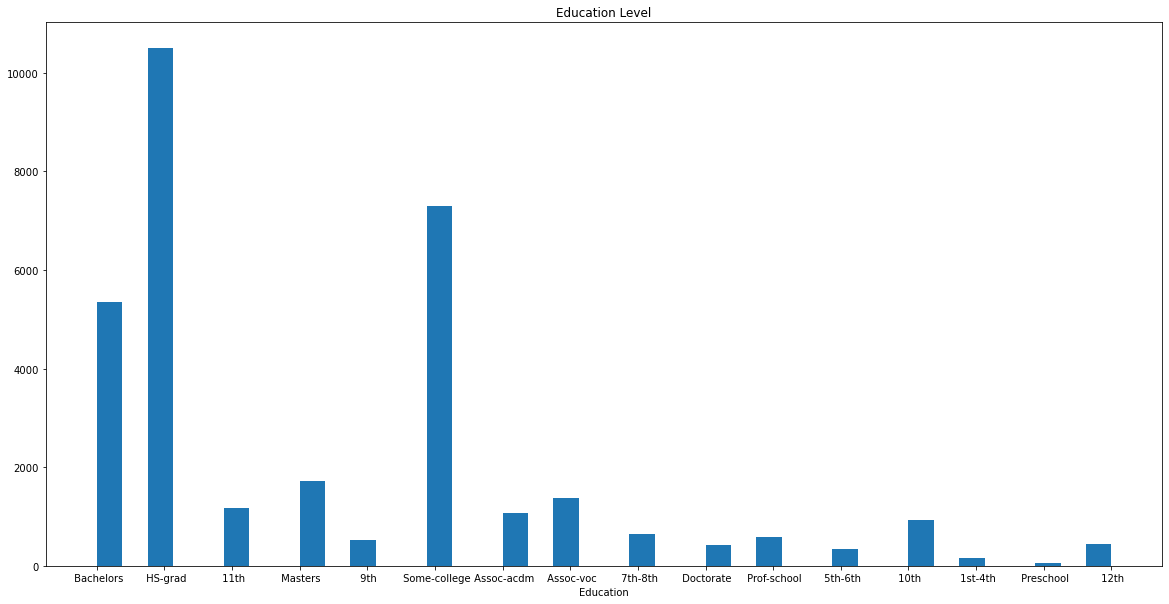

In [4]:
plt.figure(figsize=(20,10))
plt.hist(df_education, bins=40)
plt.gca().set(title='Education Level', xlabel='Education');

### H2 Histogram of working hours per week for people with income over 50K

In [5]:
df_hours_per_week = data[['Hours-per-week','Income']] 
df_hours_per_week

,Hours-per-week,Income
0,40,<=50K
1,13,<=50K
2,40,<=50K
3,40,<=50K
4,40,<=50K
...,...,...
32556,38,<=50K
32557,40,>50K
32558,40,<=50K
32559,20,<=50K


In [16]:
#df_income_over_50k = df_hours_per_week['Income']
df_income_over_50k = pd.DataFrame(df_hours_per_week)
df_income_over_50k = df_income_over_50k[df_income_over_50k['Income'] == ' >50K']
df_income_over_50k

,Hours-per-week,Income
7,45,>50K
8,50,>50K
9,40,>50K
10,80,>50K
11,40,>50K
...,...,...
32539,10,>50K
32545,20,>50K
32554,40,>50K
32557,40,>50K


ConversionError: Failed to convert value(s) to axis units: array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype=object)

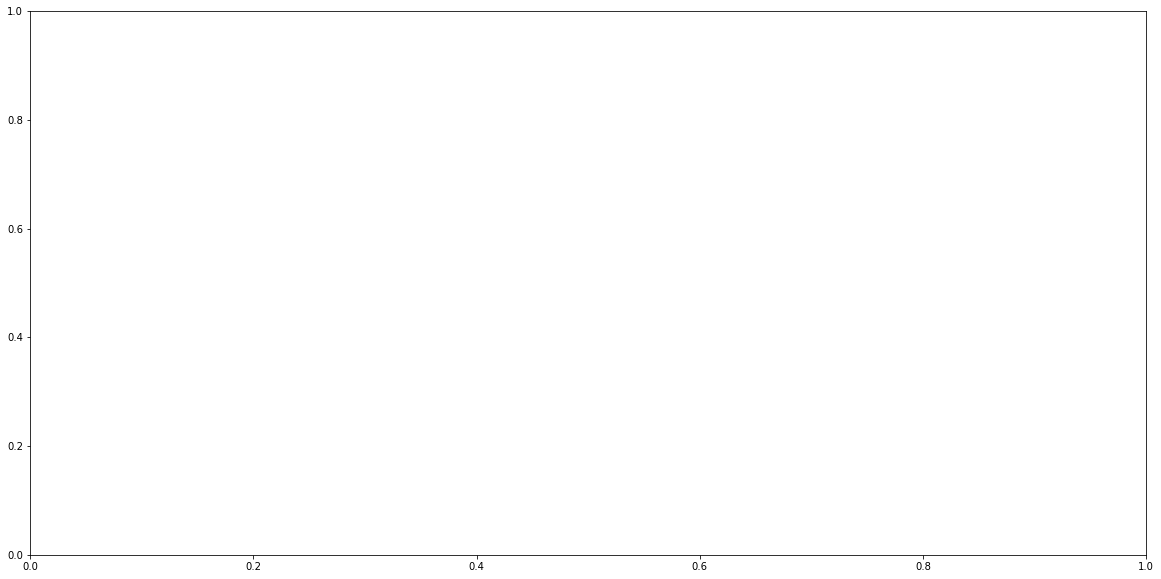

In [17]:
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k, bins=40)
plt.gca().set(title='Working hours ', xlabel='Education');